In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

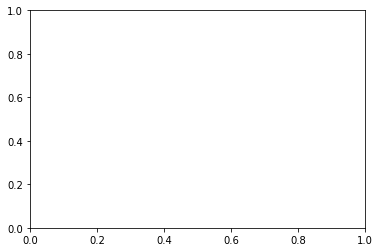

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1)

In [10]:
type(fig)

matplotlib.figure.Figure

In [11]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [12]:
fig.get_size_inches()

array([ 6.,  4.])

In [13]:
fig.set_size_inches(14, 4)

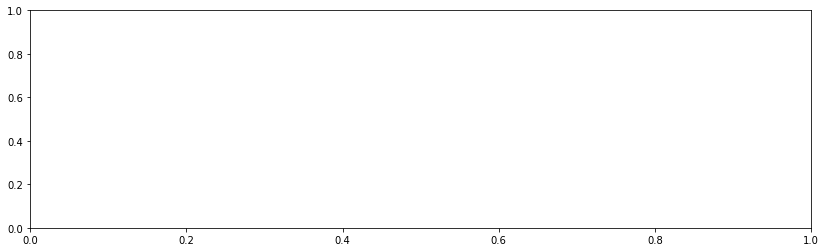

In [14]:
fig

In [16]:
fig.axes

In [17]:
fig.axes[0] is ax

True

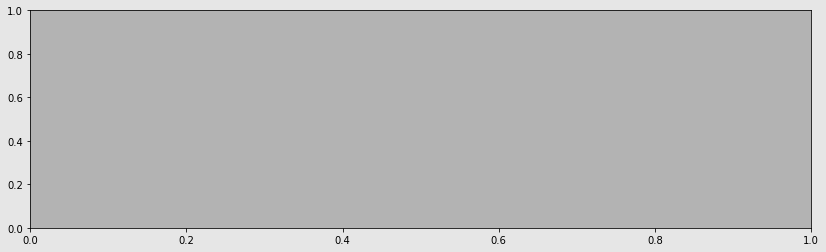

In [18]:
fig.set_facecolor('.9')
ax.set_facecolor('.7')
fig

In [20]:
ax_children = ax.get_children()
ax_children

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

In [21]:
spines = ax.spines
spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x10921a470>),
             ('right', <matplotlib.spines.Spine at 0x10921a5c0>),
             ('bottom', <matplotlib.spines.Spine at 0x10921a748>),
             ('top', <matplotlib.spines.Spine at 0x10921a898>)])

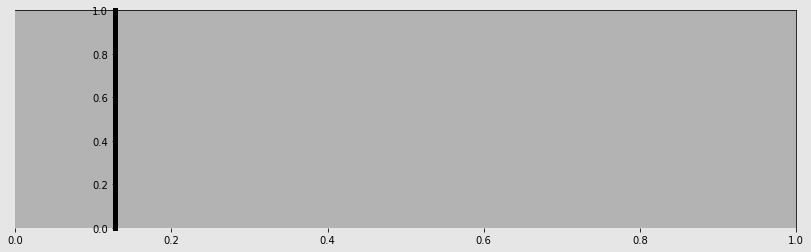

In [22]:
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)
spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


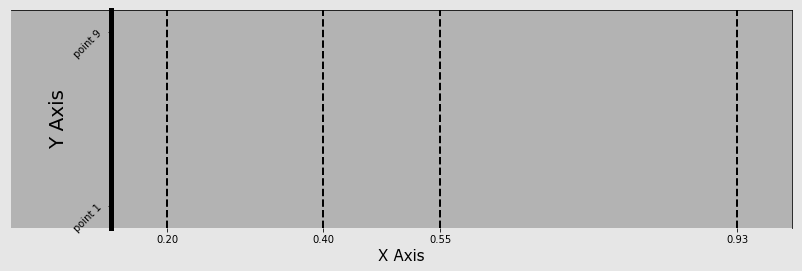

In [23]:
ax.xaxis.grid(True, which='major', linewidth=2,
              color='black', linestyle='--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family='Verdana', fontsize=15)
ax.set_ylabel('Y Axis', family='Calibri', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
fig

In [26]:
movie = pd.read_csv('~/Downloads/movie.csv')
med_budget = movie.groupby('title_year')['budget'].median() / 1e6
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

Get data into NumPy arrays

In [28]:
years = med_budget_roll.index.values
years[-5:]

array([ 2012.,  2013.,  2014.,  2015.,  2016.])

In [29]:
budget = med_budget_roll.values
budget[-5:]

array([ 20.893,  19.893,  19.1  ,  17.98 ,  17.78 ])

Text(0,0.5,'Millions of Dollars')

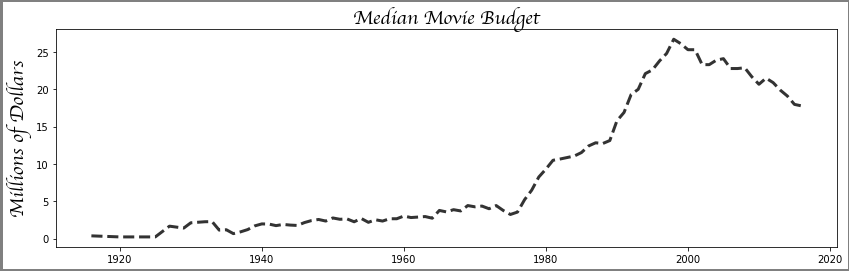

In [30]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5,
                       edgecolor='.5')
ax.plot(years, budget, linestyle='--',
        linewidth=3, color='.2', label='All Movies')
text_kwargs=dict(fontsize=20, family='cursive')
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

Median movie budget had been increasing until 2000 then began to decline.

In [31]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

In [32]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

In [33]:
fifth_year = (years % 5 == 0) & (years >= 1970)
years_5 = years[fifth_year]
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]

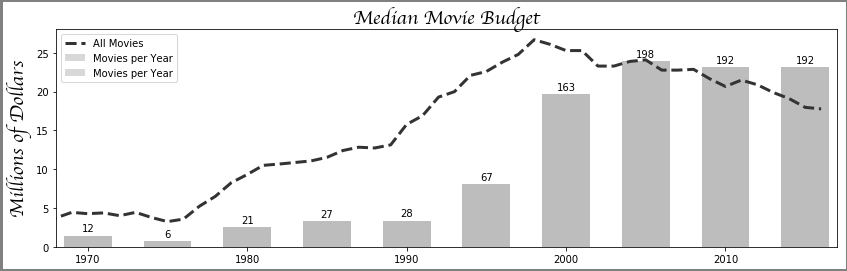

In [35]:
ax.bar(years_5, ct_norm_5, 3, facecolor='.5',
       alpha=.3, label='Movies per Year')
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend()
fig